In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import re
from qbstyles import mpl_style
from matplotlib import dates as mdates
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from numpy.random import RandomState

In [40]:
discharge = pd.read_excel(r'D:\DA108\data\Cardiac_Outcomes.xlsx','Hospitalization_Discharge')
complications = pd.read_excel(r'D:\DA108\data\Cardiac_Outcomes.xlsx',"CardiacComplications")
responsivenes = pd.read_excel(r'D:\DA108\data\Cardiac_Outcomes.xlsx',"Responsivenes")
labs = pd.read_excel(r'D:\DA108\data\Cardiac_Outcomes.xlsx','Labs')
history = pd.read_excel(r'D:\DA108\data\Cardiac_Outcomes.xlsx',"PatientHistory")
demo =pd.read_excel(r'D:\DA108\data\Cardiac_Outcomes.xlsx',"Demography")
prescriptions=pd.read_excel(r'D:\DA108\data\Cardiac_Outcomes.xlsx',"Patient_Precriptions")

# Q4 : What percentage of patients had Biventricular heart failure?

In [70]:
patients_both_hearth_failure = complications['inpatient_number'][complications['type_of_heart_failure']=='Both'].count()
total_patients = complications['inpatient_number'].count()
print('Percentage of patients with biventricular heart failure is : ',(patients_both_hearth_failure/total_patients)*100)

Percentage of patients with biventricular heart failure is :  73.70517928286853


# Q5 : What is the ratio of patients who were responsive to pain vs responsive to sound?

In [68]:
from fractions import Fraction
patients_pain = discharge['inpatient_number'][responsivenes['consciousness']=='ResponsiveToPain'].count()
patients_sound = discharge['inpatient_number'][responsivenes['consciousness']=='ResponsiveToSound'].count()
print(Fraction(patients_pain,patients_sound))

4/19


# Q6 : What was the average age group of the patients that had an outcome of 'Alive'?

# Q7 : Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

<AxesSubplot:>

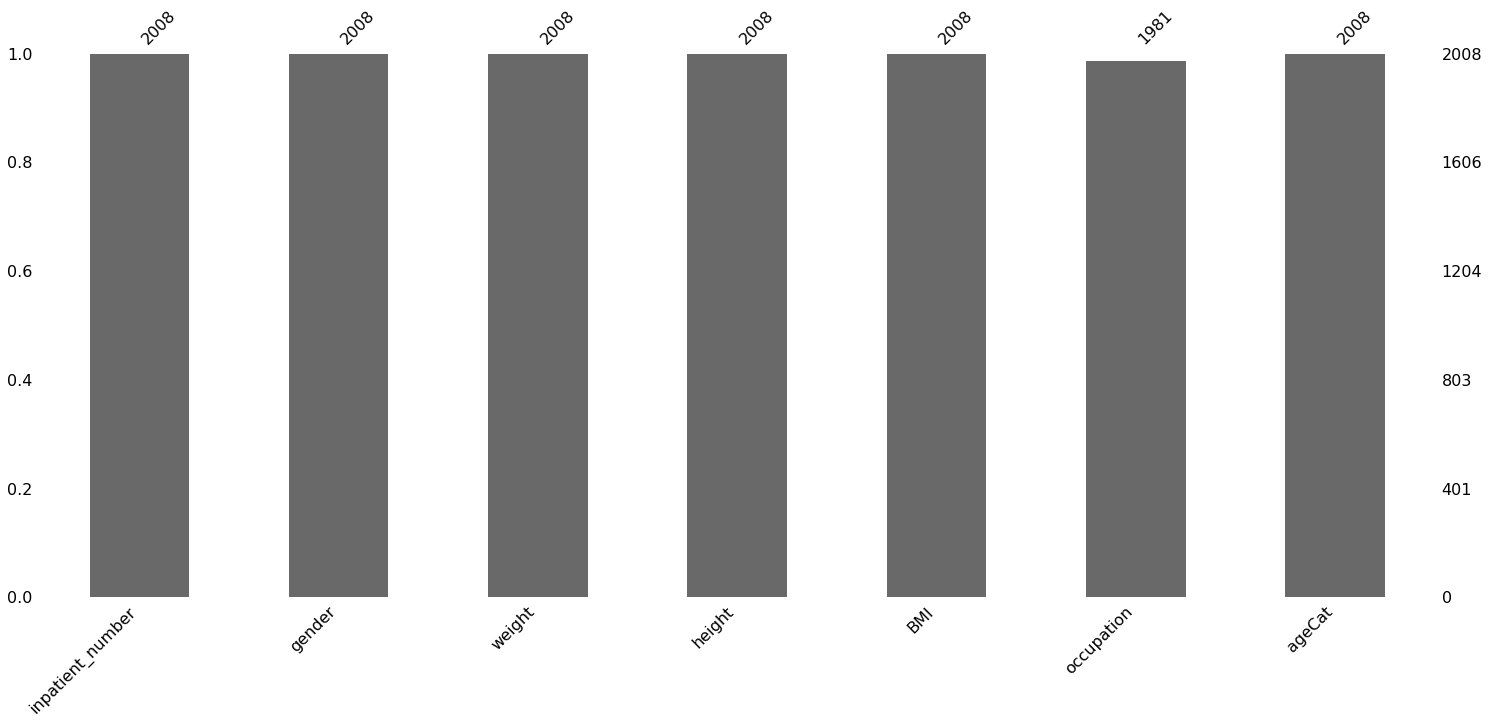

In [72]:
#Only Occupation column has 27 null values
msno.bar(demo)

<AxesSubplot:>

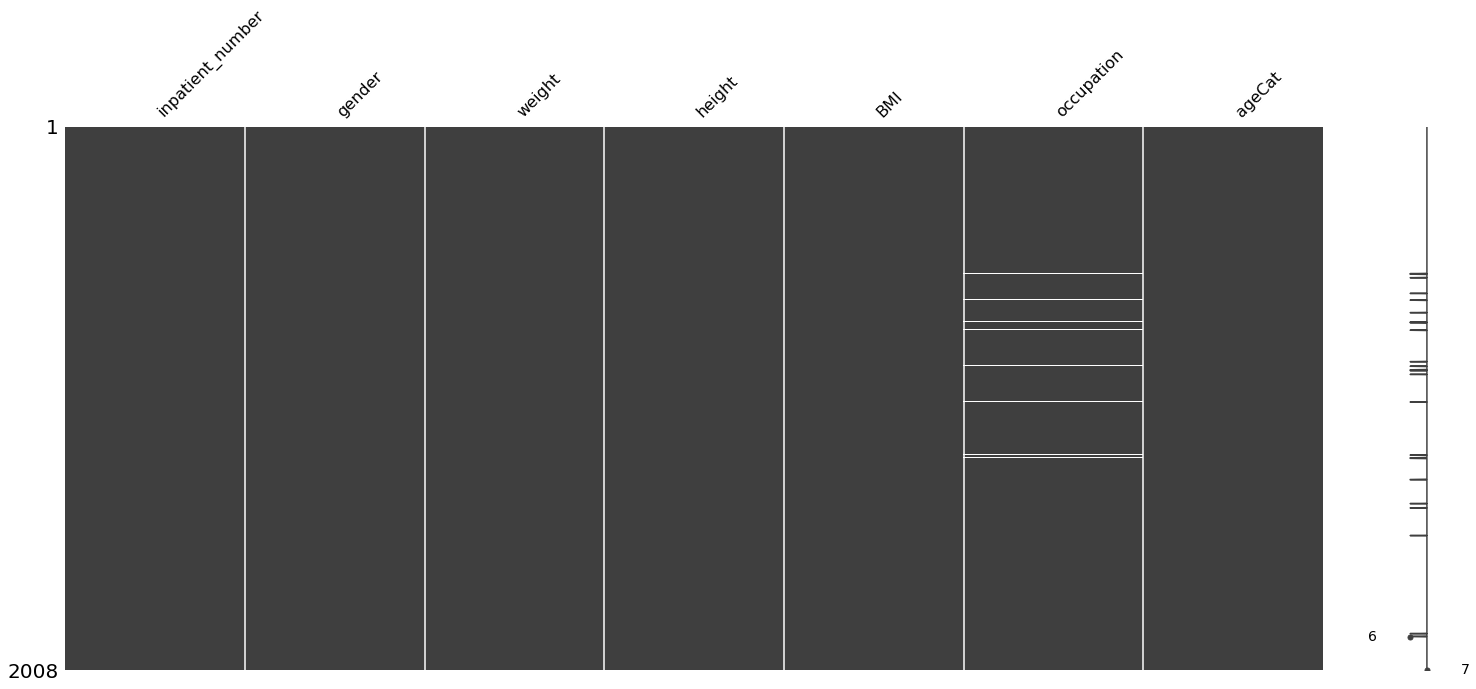

In [73]:
msno.matrix(demo)

# Q13 : Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

In [74]:
los_hypo = discharge['dischargeDay'][labs['body_temperature']<=35].mean()
los_hyper = discharge['dischargeDay'][labs['body_temperature']>=40].mean()
los_normal = discharge['dischargeDay'][(labs['body_temperature']>35) & (labs['body_temperature']<40)].mean()

<BarContainer object of 3 artists>

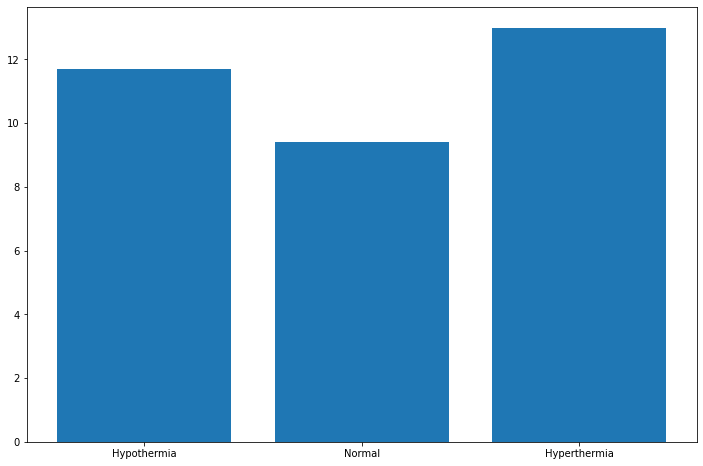

In [75]:
x = ['Hypothermia','Normal','Hyperthermia']
y = [los_hypo,los_normal,los_hyper]
plt.figure(figsize=(12,8))
plt.bar(x,y)

# Q14 : Find the list of patients whose DischargeDay is greater than the value given by the user

In [56]:
dischargeDay_user = float(input('Please enter value for discharge day : '))
discharge['inpatient_number'][discharge['dischargeDay']>dischargeDay_user]

Please enter value for discharge day117


884     794077.0
1613    768711.0
Name: inpatient_number, dtype: float64

# Q15 : Display a pie chart of number of patients in each category listed

-death_within_28_days
-re_admission_within_28_days
-death_within_3_months 
-re_admission_within_3_months 
-death_within_6_months 
-re_admission_within_6_months
-return_to_emergency_department_within_6_months

In [42]:
x = ["death_within_28_days","re_admission_within_28_days","death_within_3_months","re_admission_within_3_months",
     "death_within_6_months","re_admission_within_6_months","return_to_emergency_department_within_6_months"]

x1_value=discharge['inpatient_number'][discharge['death_within_28_days']==1].count()
x2_value = discharge['inpatient_number'][discharge['re_admission_within_28_days']==1].count()
x3_value=discharge['inpatient_number'][discharge['death_within_3_months']==1].count()
x4_value = discharge['inpatient_number'][discharge['re_admission_within_3_months']==1].count()
x5_value = discharge['inpatient_number'][discharge['death_within_6_months']==1].count()
x6_value=discharge['inpatient_number'][discharge['re_admission_within_6_months']==1].count()
x7_value = discharge['inpatient_number'][discharge['return_to_emergency_department_within_6_months']==1].count()

y = [x1_value,x2_value,x3_value,x4_value,x5_value,x6_value,x7_value]

([<matplotlib.patches.Wedge at 0x1a838834b48>,
 [Text(1.0986219949868896, 0.05504282088544284, 'death_within_28_days'),
  Text(1.0542143365073364, 0.3140575308799279, 're_admission_within_28_days'),
  Text(0.945860290510759, 0.5615588222394006, 'death_within_3_months'),
  Text(0.32971167644331695, 1.049423751597484, 're_admission_within_3_months'),
  Text(-0.4749721693961055, 0.9921700652101724, 'death_within_6_months'),
  Text(-1.099998993199643, 0.0014882740916925341, 're_admission_within_6_months'),
  Text(0.5487105836749366, -0.9533712264187075, 'return_to_emergency_department_within_6_months')])

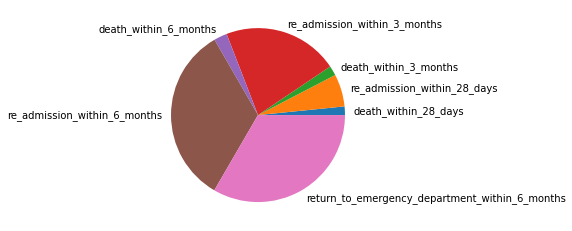

In [9]:
plt.pie(y,labels=x)

# Q16 : Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [41]:
df = pd.DataFrame({'inpatient_number': discharge['inpatient_number'],
                   'myocardial_infarction': complications['myocardial_infarction'],
                   'congestive_heart_failure': complications['congestive_heart_failure'],
                  'peripheral_vascular_disease': complications['peripheral_vascular_disease'],
                  'uric_acid':labs['uric_acid'],
                  'BMI' : demo['BMI']})
df.head()
avg_uric_acid = df['uric_acid'].mean()
avg_BMI = df['BMI'].mean()

In [34]:
df.melt(value_vars=['myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease'],
        id_vars=['uric_acid','BMI'])

,uric_acid,BMI,variable,value
0,685.0,18.590125,myocardial_infarction,0.0
1,170.0,19.195303,myocardial_infarction,0.0
2,567.0,24.221453,myocardial_infarction,0.0
3,635.0,22.491349,myocardial_infarction,0.0
4,432.0,31.633715,myocardial_infarction,0.0
...,...,...,...,...
6019,739.0,15.555556,peripheral_vascular_disease,0.0
6020,396.0,20.811655,peripheral_vascular_disease,0.0
6021,377.0,25.951557,peripheral_vascular_disease,0.0
6022,1409.0,17.777778,peripheral_vascular_disease,0.0


# Q26:Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [112]:
li = []
for category in demo['ageCat']:
    min = category.split('-')[0]
    max = category.split('-')[1]
    age = np.random.randint(min,max)
    li.append(age)
print(len(li))
li
demo['ageRandom'] = li
demo[['ageCat','ageRandom']].head(10)

2008


,ageCat,ageRandom
0,69-79,77
1,69-79,74
2,59-69,59
3,69-79,71
4,69-79,73
5,79-89,80
6,79-89,80
7,69-79,74
8,79-89,84
9,69-79,75


In [113]:
print('Average age of patients is:',round((np.average(demo['ageRandom'])),1))

Average age of patients is: 74.0


# Q27 : Using the age column generated in Q.26, calculate year of birth for each patient

In [114]:
YOB = []
for age in demo['ageRandom']:
    yob = 2024 - age
    YOB.append(yob)
demo['Year of Birth'] = YOB
demo[['ageCat','ageRandom','Year of Birth']].head(10)

,ageCat,ageRandom,Year of Birth
0,69-79,77,1947
1,69-79,74,1950
2,59-69,59,1965
3,69-79,71,1953
4,69-79,73,1951
5,79-89,80,1944
6,79-89,80,1944
7,69-79,74,1950
8,79-89,84,1940
9,69-79,75,1949


# Q33 : Retrieve the row with minimum white_blood_cell count using sorting technique.

In [76]:
pd.set_option('display.max_columns',None)
Min_WBC = labs.sort_values(by = 'white_blood_cell',ascending = True,inplace = False)
Min_WBC.head(1)

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,uric_acid,glomerular_filtration_rate,cystatin,white_blood_cell,monocyte_ratio,monocyte_count,red_blood_cell,coefficient_of_variation_of_red_blood_cell_distribution_width,standard_deviation_of_red_blood_cell_distribution_width,mean_corpuscular_volume,hematocrit,lymphocyte_count,mean_hemoglobin_volume,mean_hemoglobin_concentration,mean_platelet_volume,basophil_ratio,basophil_count,eosinophil_ratio,eosinophil_count,hemoglobin,platelet,platelet_distribution_width,platelet_hematocrit,neutrophil_ratio,neutrophil_count,D_dimer,international_normalized_ratio,activated_partial_thromboplastin_time,thrombin_time,prothrombin_activity,prothrombin_time_ratio,fibrinogen,high_sensitivity_troponin,myoglobin,carbon_dioxide_binding_capacity,calcium,potassium,chloride,sodium,Inorganic_Phosphorus,serum_magnesium,creatine_kinase_isoenzyme_to_creatine_kinase,hydroxybutyrate_dehydrogenase_to_lactate_dehydrogenase,hydroxybutyrate_dehydrogenase,glutamic_oxaloacetic_transaminase,creatine_kinase,creatine_kinase_isoenzyme,lactate_dehydrogenase,brain_natriuretic_peptide,high_sensitivity_protein,nucleotidase,fucosidase,albumin,white_globulin_ratio,cholinesterase,glutamyltranspeptidase,glutamic_pyruvic_transaminase,glutamic_oxaliplatin,indirect_bilirubin,alkaline_phosphatase,globulin,direct_bilirubin,total_bilirubin,total_bile_acid,total_protein,erythrocyte_sedimentation_rate,cholesterol,low_density_lipoprotein_cholesterol,triglyceride,high_density_lipoprotein_cholesterol,homocysteine,apolipoprotein_A,apolipoprotein_B,lipoprotein,pH,standard_residual_base,standard_bicarbonate,partial_pressure_of_carbon_dioxide,total_carbon_dioxide,methemoglobin,hematocrit_blood_gas,reduced_hemoglobin,potassium_ion,chloride_ion,sodium_ion,glucose_blood_gas,lactate,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
865,746068.0,37.1,71.0,20.0,130.0,88.0,102.0,21.0,88.8,7.26,379.0,50.86,1.51,1.66,0.048,0.08,2.4,17.0,71.3,119.2,0.286,0.72,39.0,327.0,12.6,0.003,0.0,0.007,0.01,94.0,73.0,17.2,0.093,0.51,0.85,0.79,1.09,35.8,19.0,77.4,1.1,2.25,0.032,NaN,27.0,2.3,4.12,105.4,144.0,NaN,NaN,0.2,0.96,288.0,30.0,146.0,29.8,301.0,207.12,NaN,1.9,13.7,43.1,1.8,NaN,10.0,14.0,NaN,25.9,43.0,23.7,11.7,37.6,4.7,66.8,4.0,3.62,0.99,0.36,1.89,NaN,NaN,NaN,NaN,7.41,-3.1,22.3,35.0,22.6,0.0,28.0,3.4,3.88,108.0,142.5,4.8,1.3,-2.6,21.6,0.3,37.0,97.0,95.0,96.3,16.8,1.11,94.0


# Q34 : get the last letter of discharge_department of patients using RegEX

In [77]:
#Reversing every value in the column discharge_department
reversed_dep = []
for dep in discharge['discharge_department']:
    rev_dep = dep[::-1]
    reversed_dep.append(rev_dep)

In [80]:
#Extracting the first letter of the reversed string and storing it in a list
first_letter = []
for i in reversed_dep:
    fl = re.findall(r'\b\w',i)
    first_letter.append(fl)
first_letter

[['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['s'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['U'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['s'],
 ['s'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['U'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['d'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['s'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['y'],
 ['y'],
 ['d'],
 ['y'],
 ['d'],
 ['y'],


In [84]:
#Original value of discharge_department and its last letter
df = pd.DataFrame({
    'discharge_department' : discharge['discharge_department'],
    'last_letter' : first_letter
})
df

,discharge_department,last_letter
0,Cardiology,[y]
1,Cardiology,[y]
2,Cardiology,[y]
3,Cardiology,[y]
4,Cardiology,[y]
...,...,...
2003,GeneralWard,[d]
2004,GeneralWard,[d]
2005,Cardiology,[y]
2006,Cardiology,[y]


# Q35 : find the way to reverse string for given input 
(eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)

In [85]:
#Getting the string from user and splitting it into a list word by word
string = input('Enter the string')
print(string)
word = string.split()
#Reversing and printing the list
r_word = word[::-1]
#Converting list into string using join 
r_string = " ".join(r_word)
print(r_string)

Enter the stringthis hackathon is about cardiac outcomes
this hackathon is about cardiac outcomes
outcomes cardiac about is hackathon this


# Q36 : Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() **
** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
** Plot (x,y) on that axes and set the labels.

In [86]:
x = np.random.randint(1,25,size=(3,4))
y = np.sin(2 * x)
print(x)
print(y)

[[ 4 10  4 17]
 [17  2 17  1]
 [23  4 12 19]]
[[ 0.98935825  0.91294525  0.98935825  0.52908269]
 [ 0.52908269 -0.7568025   0.52908269  0.90929743]
 [ 0.90178835  0.98935825 -0.90557836  0.29636858]]


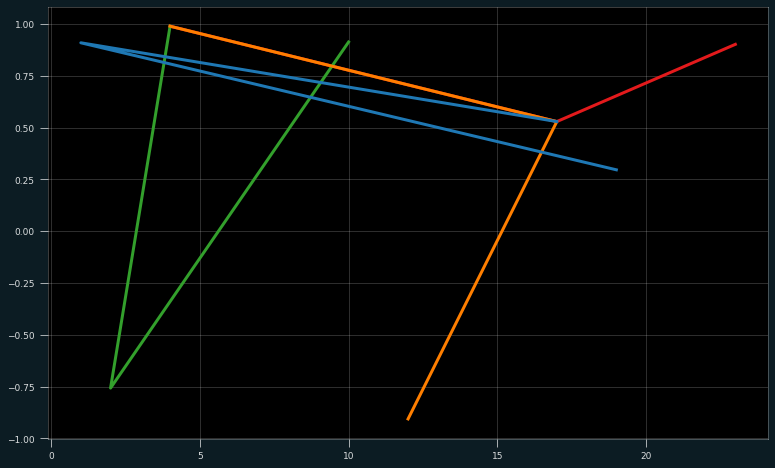

In [89]:
mpl_style(dark=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1], facecolor='0')
ax.plot(x,y,lw=3,ms=7)

# Q37 : Using dischargeDay values print even if it even number and odd if it odd number

In [90]:
discharge['dischargeDay']

0       11.0
1        8.0
2        5.0
3       11.0
4        5.0
        ... 
2003     5.0
2004     8.0
2005    14.0
2006     1.0
2007     6.0
Name: dischargeDay, Length: 2008, dtype: float64

In [91]:
dischargeDay = discharge['dischargeDay']
for i in dischargeDay:
    if (i%2 == 0):
        print(str(i)+'  even')
    else:
        print(str(i)+'  odd')

11.0  odd
8.0  even
5.0  odd
11.0  odd
5.0  odd
6.0  even
10.0  even
27.0  odd
20.0  even
4.0  even
9.0  odd
9.0  odd
11.0  odd
22.0  even
8.0  even
3.0  odd
16.0  even
14.0  even
7.0  odd
10.0  even
5.0  odd
11.0  odd
7.0  odd
9.0  odd
9.0  odd
8.0  even
8.0  even
5.0  odd
11.0  odd
7.0  odd
7.0  odd
10.0  even
15.0  odd
4.0  even
9.0  odd
6.0  even
7.0  odd
7.0  odd
7.0  odd
4.0  even
3.0  odd
5.0  odd
8.0  even
4.0  even
9.0  odd
9.0  odd
11.0  odd
19.0  odd
6.0  even
7.0  odd
15.0  odd
4.0  even
18.0  even
3.0  odd
11.0  odd
14.0  even
12.0  even
11.0  odd
9.0  odd
8.0  even
7.0  odd
2.0  even
9.0  odd
30.0  even
8.0  even
6.0  even
3.0  odd
5.0  odd
21.0  odd
8.0  even
7.0  odd
8.0  even
5.0  odd
5.0  odd
5.0  odd
7.0  odd
10.0  even
6.0  even
10.0  even
7.0  odd
8.0  even
11.0  odd
9.0  odd
15.0  odd
7.0  odd
5.0  odd
7.0  odd
6.0  even
5.0  odd
26.0  even
11.0  odd
3.0  odd
7.0  odd
7.0  odd
2.0  even
14.0  even
12.0  even
6.0  even
10.0  even
4.0  even
9.0  odd
9.0  odd
8.0  ev

# Q38 : find the length of Tuple for any given input (Hint: Input a string from user )

In [92]:
sentence = input('Please provide your input:')
tup = sentence.split()
print(tup)
print('Length of tuple is : ',len(tup))

Please provide your input:I have 10 roses
['I', 'have', '10', 'roses']
Length of tuple is :  4


# Q39 : Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

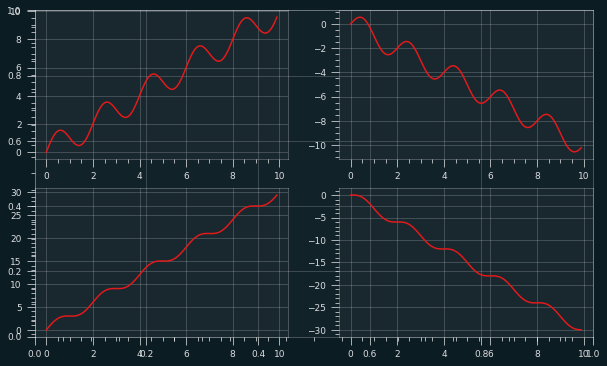

In [93]:
x = np.arange(0,10,0.1)
y = np.sin(np.pi*x)+x # Taking y value for plotting in axis[0,0]. Other values were not mentioned so created 3 more y values to plot the other graphs.
y1 = np.sin(np.pi*x)-x
y2 = np.sin(np.pi*x)+3*x
y3 = np.sin(np.pi*x)-3*x
fig,axis = plt.subplots(2,2,figsize=(10,6),)
axis[0,0].plot(x,y)
axis[0,1].plot(x,y1)
axis[1,0].plot(x,y2)
axis[1,1].plot(x,y3)

# Q40 : Select 25 different random values between 200 to 800.

In [94]:
values = np.random.randint(200,800,25)
print('25 random values between 200 and 800 are : ',values)

25 random values between 200 and 800 are :  [289 395 442 699 237 586 506 317 728 536 233 728 759 310 534 627 613 591
 370 329 208 583 601 457 577]


# Q41 : Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months

In [96]:
#Converting Admission date to a string type to get only month and year and storing it in a new column new_admin_date
discharge['new_admin_date'] = pd.to_datetime(discharge['Admission_date']).dt.strftime('%m/%Y')
#Getting the count of patients grouped on new_admin_date and storing in new column new1
new1 = discharge.groupby(['new_admin_date'])['inpatient_number'].count()
#Creating a new dataframe with new date and respective patient count
df = discharge.groupby(['new_admin_date'])['inpatient_number'].agg('count').reset_index()
df.head()

,new_admin_date,inpatient_number
0,01/2016,45
1,01/2017,46
2,01/2018,45
3,01/2019,50
4,02/2016,47


In [97]:
#Converting the date back to datetime format
df['new_admin_date'] = pd.to_datetime(df['new_admin_date'])
#Sorting based on date
df.sort_values('new_admin_date',inplace=True)
df.head()

,new_admin_date,inpatient_number
0,2016-01-01,45
4,2016-02-01,47
8,2016-03-01,47
12,2016-04-01,38
16,2016-05-01,37


In [98]:
#Terminating the date values which we dont need
df.new_admin_date = pd.to_datetime(df.new_admin_date).dt.to_period('m')
df.head(5)

,new_admin_date,inpatient_number
0,2016-01,45
4,2016-02,47
8,2016-03,47
12,2016-04,38
16,2016-05,37


Text(0, 0.5, 'count of patients')

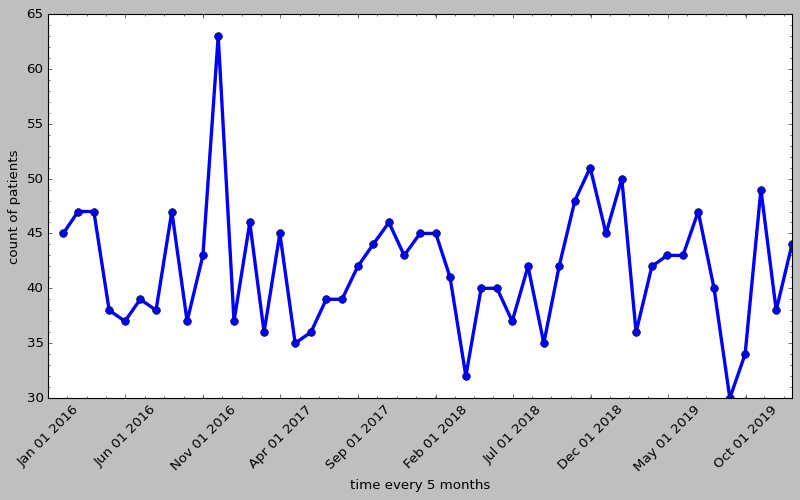

In [107]:
#Plotting the count of patients vs date which are 5 months apart
date = df['new_admin_date']
p_count = df['inpatient_number']
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.plot_date(x=date,y=p_count,linestyle='solid',lw=3,ms=7)
ticks = ['2016-01','2016-06','2016-11','2017-04','2017-09','2018-02','2018-07','2018-12','2019-05','2019-10']
plt.xticks(ticks,rotation=45)
plt.xlabel('time every 5 months')
plt.ylabel('count of patients')

# Q42 : np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. 
When the value is less than 9, print as 0,else print 1

In [108]:
#Printing the array to check the indices
a = np.arange(1,21).reshape(4,5)
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [109]:
#Slicing the array to get first two elements
ar1=a[0,0:2]
print(ar1)
#Creating another array to access the values 8 and 19
ar2 = [a[1,2],a[3,3]]
print(ar2)
#Concatenating the two arrays
ar=np.concatenate((ar1,ar2),axis=None)
ar

[1 2]
[8, 19]


array([ 1,  2,  8, 19])

In [110]:
#Traversing through ar to print 0 if value less that 9 else 1.
for i in ar:
    if i<9:
        print(i,'0')
    else:
        print(i, '1')

1 0
2 0
8 0
19 1


# Q43 : Give Distribution chart of max Killip_grade

Text(0, 0.5, 'Num of patients')

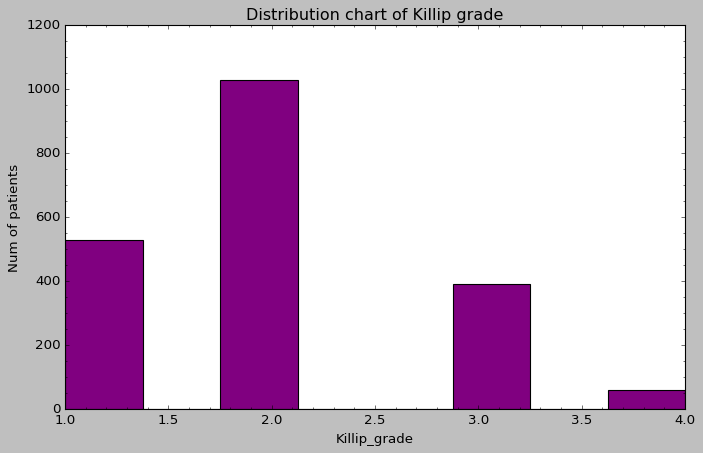

In [111]:
'''If we plot the distribution chart of max Killip_grade there will be only one bar. 
So we plotted the distribution chart for all values and found that max value of killip grade is 4 whereas
max patients have killip grade of 2.'''
plt.figure(figsize=(10,6))
plt.hist(complications['Killip_grade'],bins=8,color='purple')
plt.title('Distribution chart of Killip grade')
plt.xlabel('Killip_grade')
plt.ylabel('Num of patients')

# Q44 : Based on Q26 and 27 display all demographic details of patients who are born in year 1945

In [115]:
demo.groupby('Year of Birth').get_group(1945)

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,ageRandom,Year of Birth
14,780534.0,Female,50.0,1.50,22.222222,UrbanResident,79-89,79,1945
32,783621.0,Female,46.0,1.50,20.444444,UrbanResident,79-89,79,1945
103,828763.0,Male,61.0,1.65,22.405877,UrbanResident,79-89,79,1945
119,857432.0,Female,40.0,1.50,17.777778,UrbanResident,79-89,79,1945
129,757269.0,Male,65.0,1.70,22.491349,UrbanResident,79-89,79,1945
177,786199.0,Male,54.0,1.64,20.077335,UrbanResident,79-89,79,1945
197,743061.0,Female,50.0,1.58,20.028842,farmer,79-89,79,1945
208,777006.0,Female,40.0,1.46,18.765247,UrbanResident,79-89,79,1945
241,805829.0,Female,41.0,1.52,17.745845,UrbanResident,79-89,79,1945
275,831859.0,Male,49.0,1.68,17.361111,UrbanResident,79-89,79,1945


# Q45 : Create a dataframe with date and time as columns, where the values are the admission time

# Q46 : Convert occupation into numeric by Label encoding

In [117]:
le = LabelEncoder()
#Transforming the values and storing in a new column
#code was throwing an error that "argument must be a string or number error python label encoder", 
#we checked what values does the occupation column contain and there were nan values too. so we added 
#astype(str) to above code so it takes the nan values to be str as well
demo['occupation1'] = le.fit_transform(demo['occupation'].astype(str))
data = pd.DataFrame({
    'occ':demo['occupation']})

data['occ_encoded'] = demo['occupation1'].values
data.drop_duplicates(inplace=True)
data.style.hide_index()

occ,occ_encoded
UrbanResident,2
farmer,3
worker,5
Others,1
Officer,0
nan,4


# Q47 : Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

In [121]:
prng = RandomState(1234567890)
prng.randint(1, 9, size=(3,3))

array([[3, 8, 7],
       [8, 5, 4],
       [2, 4, 2]])

# Q48 : Using loops, create a multiplication table for the number 7

In [118]:
num = int(input('Till what num do you want the multiplication table:'))
for i in range(1,num+1):
    print(str(i)+' x 7 =',i*7)

Till what num do you want the multiplication table:5
1 x 7 = 7
2 x 7 = 14
3 x 7 = 21
4 x 7 = 28
5 x 7 = 35


# Q50 : Display the lab details of the patient with maximum pulse using the .loc

In [122]:
Labs_max_pulse = labs.loc[labs['pulse']==labs['pulse'].max()]
Labs_max_pulse

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,uric_acid,glomerular_filtration_rate,cystatin,white_blood_cell,monocyte_ratio,monocyte_count,red_blood_cell,coefficient_of_variation_of_red_blood_cell_distribution_width,standard_deviation_of_red_blood_cell_distribution_width,mean_corpuscular_volume,hematocrit,lymphocyte_count,mean_hemoglobin_volume,mean_hemoglobin_concentration,mean_platelet_volume,basophil_ratio,basophil_count,eosinophil_ratio,eosinophil_count,hemoglobin,platelet,platelet_distribution_width,platelet_hematocrit,neutrophil_ratio,neutrophil_count,D_dimer,international_normalized_ratio,activated_partial_thromboplastin_time,thrombin_time,prothrombin_activity,prothrombin_time_ratio,fibrinogen,high_sensitivity_troponin,myoglobin,carbon_dioxide_binding_capacity,calcium,potassium,chloride,sodium,Inorganic_Phosphorus,serum_magnesium,creatine_kinase_isoenzyme_to_creatine_kinase,hydroxybutyrate_dehydrogenase_to_lactate_dehydrogenase,hydroxybutyrate_dehydrogenase,glutamic_oxaloacetic_transaminase,creatine_kinase,creatine_kinase_isoenzyme,lactate_dehydrogenase,brain_natriuretic_peptide,high_sensitivity_protein,nucleotidase,fucosidase,albumin,white_globulin_ratio,cholinesterase,glutamyltranspeptidase,glutamic_pyruvic_transaminase,glutamic_oxaliplatin,indirect_bilirubin,alkaline_phosphatase,globulin,direct_bilirubin,total_bilirubin,total_bile_acid,total_protein,erythrocyte_sedimentation_rate,cholesterol,low_density_lipoprotein_cholesterol,triglyceride,high_density_lipoprotein_cholesterol,homocysteine,apolipoprotein_A,apolipoprotein_B,lipoprotein,pH,standard_residual_base,standard_bicarbonate,partial_pressure_of_carbon_dioxide,total_carbon_dioxide,methemoglobin,hematocrit_blood_gas,reduced_hemoglobin,potassium_ion,chloride_ion,sodium_ion,glucose_blood_gas,lactate,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
457,756996.0,36.0,198.0,19.0,105.0,69.0,81.0,33.0,64.3,4.78,354.0,74.09,1.82,4.1,0.047,0.19,4.3,17.5,53.2,86.8,0.374,0.41,27.9,321.0,15.1,0.003,0.01,0.003,0.01,120.0,79.0,15.5,0.118,0.848,3.48,18.23,1.1,26.2,17.2,81.1,1.11,2.08,0.066,NaN,29.5,2.12,3.76,92.5,133.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1764.08,NaN,5.3,21.1,30.0,1.0,NaN,205.0,19.0,NaN,7.4,148.0,31.2,4.8,12.2,5.0,61.2,NaN,5.03,2.2,1.06,1.2,NaN,NaN,NaN,NaN,7.48,1.2,26.0,34.0,25.9,0.0,39.0,1.6,3.76,97.0,130.5,4.7,2.3,1.7,24.8,0.8,37.0,98.0,125.0,97.6,12.5,1.07,132.0


# Q51 : Display a violin chart to show distribution of Pulse Rate against age.

In [123]:
#Creating a new column age that is the average of values of ageCat
li = []
for category in demo['ageCat']:
    min = int(category.split('-')[0])
    max = int(category.split('-')[1])
    age = int((min+max)/2)
    li.append(age)
labs['age'] = li

In [124]:
labs['age'].value_counts()

74    715
84    646
64    368
54    106
99    101
44     56
34     12
25      4
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='pulse'>

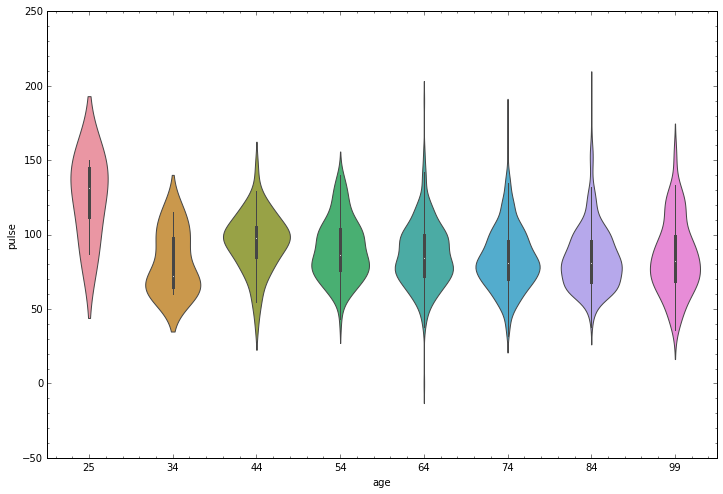

In [125]:
#Plotting the pulse rate vs age
plt.figure(figsize=(12,8))
sns.violinplot(data=labs,x='age',y='pulse')

<AxesSubplot:xlabel='ageCat', ylabel='pulse'>

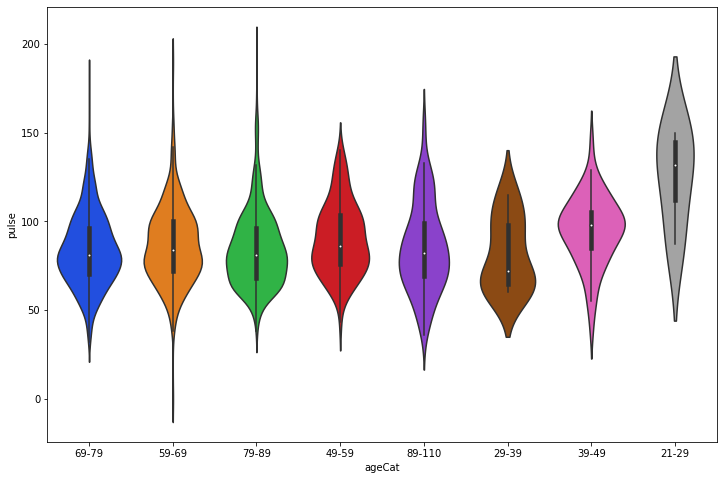

In [32]:
Labs['ageCat'] = Demography['ageCat']
plt.figure(figsize=(12,8))
sns.violinplot(data=Labs,x='ageCat',y='pulse',palette='bright')

# Q52 : Create a Point Plot on Age against time to readmission.

In [7]:
#Considering time to readmission to be readmission_time_days_from_admission
#Checking how many null values
discharge['readmission_time_days_from_admission'].isnull().sum()

1107

In [8]:
#Dropping the null values
discharge['readmission_time_days_from_admission'].dropna(inplace=True)

In [10]:
#Taking the mean age calculated in the Labs dataset
discharge['age'] = labs['age']

C:\Users\anubh\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot:xlabel='age', ylabel='readmission_time_days_from_admission'>

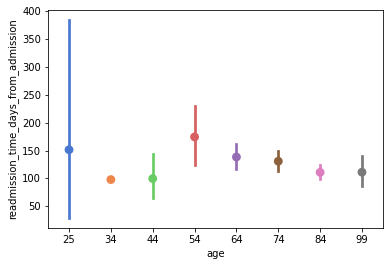

In [11]:
sns.pointplot(data=discharge,x='age',y='readmission_time_days_from_admission',palette='muted')

# Q53 : What is the correlation between CCI score and outcome?

In [13]:
history['Outcome'] = discharge['outcome_during_hospitalization']

In [14]:
history['Outcome'].unique()

array(['Alive', 'Dead', 'DischargeAgainstOrder'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
history['Outcome'] = le.fit_transform(history['Outcome'])

In [16]:
history['Outcome'].unique()

array([0, 1, 2])

In [17]:
corr = history.corr(method = 'pearson')
corr

,inpatient_number,cerebrovascular_disease,dementia,Chronic_obstructive_pulmonary_disease,connective_tissue_disease,peptic_ulcer_disease,diabetes,moderate_to_severe_chronic_kidney_disease,hemiplegia,leukemia,malignant_lymphoma,solid_tumor,liver_disease,AIDS,CCI_score,acute_renal_failure,Outcome
inpatient_number,1.000000,0.028062,-0.003456,-0.006770,-0.007891,-0.004736,-0.001750,0.042601,-0.010817,NaN,0.036657,0.007574,-0.049821,-0.004407,0.011785,0.025423,-0.023143
cerebrovascular_disease,0.028062,1.000000,-0.021119,-0.002398,-0.012694,0.008128,0.009823,0.020328,0.248313,NaN,0.078560,-0.012536,-0.012092,-0.012694,0.263915,0.015333,0.017493
dementia,-0.003456,-0.021119,1.000000,-0.089300,-0.011012,-0.008395,-0.039033,-0.046308,-0.019111,NaN,-0.005502,-0.034688,-0.051527,-0.011012,0.147141,-0.014578,-0.041954
Chronic_obstructive_pulmonary_disease,-0.006770,-0.002398,-0.089300,1.000000,0.053562,0.018630,-0.044469,-0.033167,-0.028092,NaN,-0.008087,0.027883,0.001927,-0.016187,0.274136,-0.021429,0.013332
connective_tissue_disease,-0.007891,-0.012694,-0.011012,0.053562,1.000000,-0.006771,-0.024560,0.001442,-0.003464,NaN,-0.000997,0.074646,-0.009340,-0.001996,0.052973,-0.002642,-0.011028
peptic_ulcer_disease,-0.004736,0.008128,-0.008395,0.018630,-0.006771,1.000000,-0.035197,-0.028722,-0.011752,NaN,-0.003383,0.051813,0.018734,-0.006771,0.144478,-0.008964,0.007061
diabetes,-0.001750,0.009823,-0.039033,-0.044469,-0.024560,-0.035197,1.000000,0.162418,0.018599,NaN,0.040605,-0.008982,-0.002724,0.001897,0.509297,0.007516,0.004636
moderate_to_severe_chronic_kidney_disease,0.042601,0.020328,-0.046308,-0.033167,0.001442,-0.028722,0.162418,1.000000,0.048158,NaN,0.040150,0.015168,0.006940,0.054054,0.559617,0.034001,0.066753
hemiplegia,-0.010817,0.248313,-0.019111,-0.028092,-0.003464,-0.011752,0.018599,0.048158,1.000000,NaN,-0.001731,-0.010912,0.016065,-0.003464,0.172701,-0.004586,0.094732
leukemia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
print('From the table we can see that Correlation between CCI score and Outcome is 0.093843')

From the table we can see that Correlation between CCI score and Outcome is 0.093843


# Q54 : For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [83]:
a = [0,1,2,6,8]
for i in a:
    if i>0 and i%2==0:
        print(i*i)

4
36
64


# Q55 : Create a jointplot on diastolic_blood_pressure & length of stay

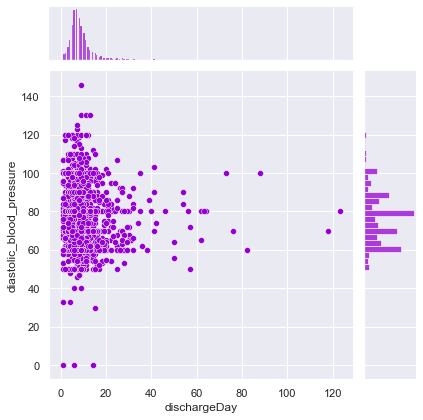

In [18]:
#dischargeDay: days from admission to hospital discharge which means no of days a patient stayed in the hospital, a.k.a length of stay
discharge['diastolic_blood_pressure'] = labs['diastolic_blood_pressure']
sns.set_theme(rc={'figure.figsize':(20,12)})
sns.jointplot(data=discharge,x='dischargeDay',y='diastolic_blood_pressure',color='darkviolet')

# Q56 : Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [19]:
rows = demo.loc[101:201] 

In [94]:
rows[['ageCat','weight']]

,ageCat,weight
101,69-79,41.0
102,79-89,64.0
103,79-89,61.0
104,79-89,40.0
105,69-79,73.0
...,...,...
197,79-89,50.0
198,89-110,50.0
199,69-79,50.0
200,59-69,63.0


# Q57 : Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values

In [20]:
df_pt = pd.DataFrame({
    'outcome_type' : discharge['outcome_during_hospitalization'],
    'ward' : discharge['admission_ward'],
    'pid' : discharge['inpatient_number']
})

In [128]:
df_pt['pid'].value_counts().sum()

2008

In [135]:
table = pd.pivot_table(df_pt,columns=ward,index=outcome_type,values='pid',aggfunc='count')

In [136]:
table

admission_ward,Cardiology,GeneralWard,ICU,Others
outcome_during_hospitalization,,,,
Alive,1472,238,12,168
Dead,8,1,1,1
DischargeAgainstOrder,67,26,2,12


# Q58 : Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

# Q61 : np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [141]:
ar = np.arange(1,31).reshape(6,5)
ar

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [150]:
ar[2:4,0:2]

array([[11, 12],
       [16, 17]])

# Q62 : What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

In [22]:
patients_alive = discharge['inpatient_number'][discharge['outcome_during_hospitalization'] == 'Alive']

In [24]:
patients_died_within28days = patients_alive[discharge['death_within_28_days']==1]

In [25]:
patients_alive_count = patients_alive.count()
patients_alive_count

1890

In [26]:
patients_died_count = patients_died_within28days.count()
patients_died_count

8

In [190]:
per = (patients_died_count/patients_alive_count)*100
print('% of patients with outcome Alive that died within 28 days is : ',round(per,2) )

% of patients with outcome Alive that died within 28 days is :  0.42


In [27]:
discharge['mpv'] = labs['mean_platelet_volume']
patient_df = discharge[(discharge['outcome_during_hospitalization'] == 'Alive') & (discharge['death_within_28_days']==1)]

In [28]:
patient_df[['inpatient_number','mpv']]

,inpatient_number,mpv
43,798240.0,12.4
74,733308.0,14.3
94,777721.0,11.9
140,860325.0,12.8
398,868283.0,13.4
505,833564.0,10.4
569,730165.0,11.3
1339,774652.0,14.3
